## Predictive analysis

In [ ]:
import pandas as pd
# Load the dataset
data = pd.read_csv("c:\\Users\\chawa\\Downloads\\tips (data for regression problem).csv")

# Display the first few rows of the dataset
data.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Check the data types of each column and any missing values
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
# Get summary statistics for numerical columns
data.describe()

# Get summary statistics for categorical columns
data.describe(include=['object'])


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


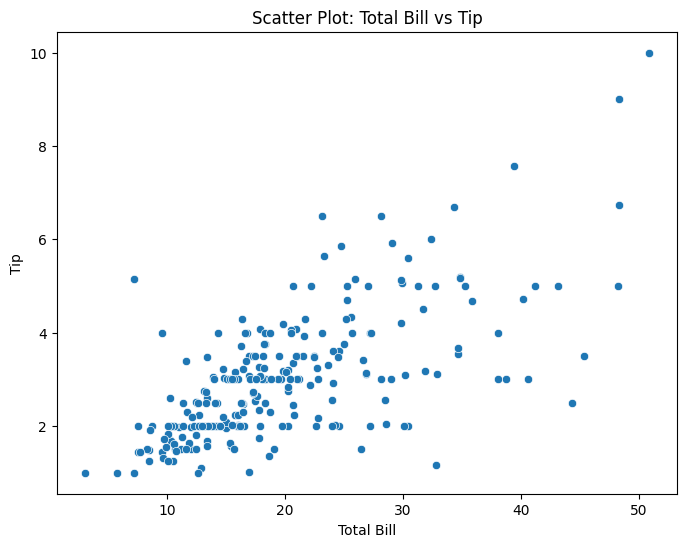

In [ ]:
# Scatter Plot:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of 'total_bill' vs. 'tip'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


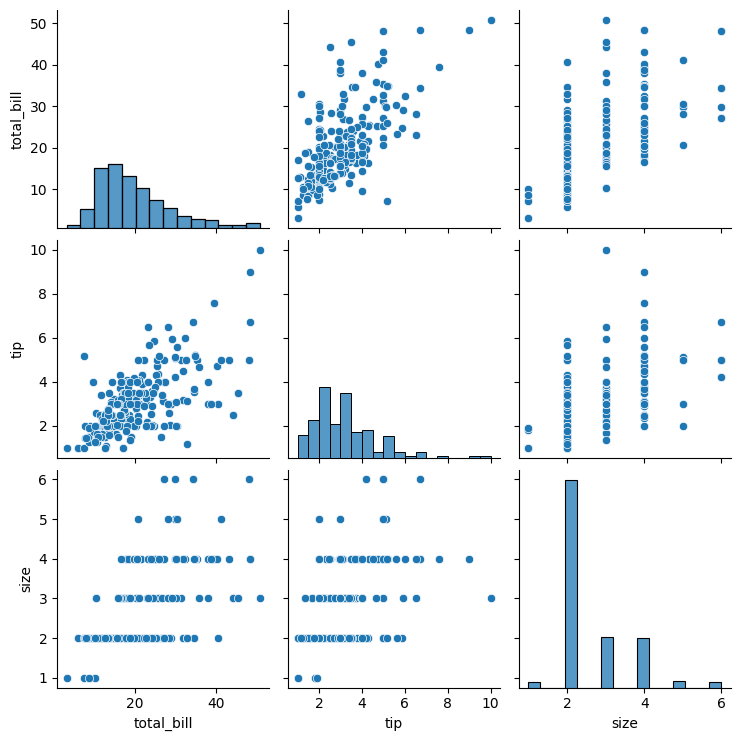

In [ ]:
# Pair Plot: For multiple features
sns.pairplot(data[['total_bill', 'tip', 'size']])
plt.show()


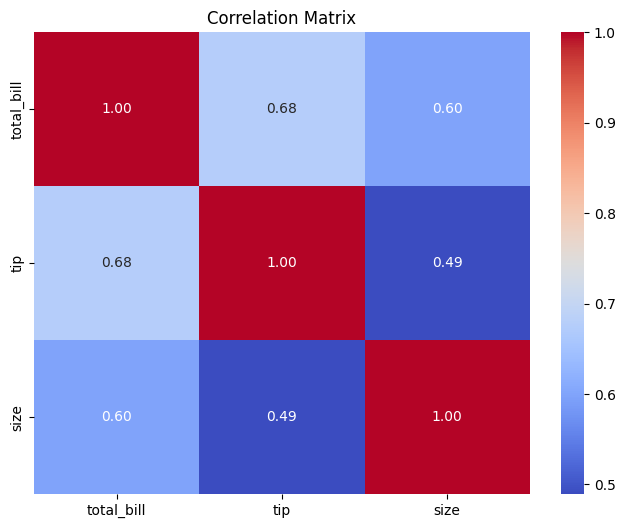

In [ ]:
# Correlation Matrix (Heatmap):
corr_matrix = data[['total_bill', 'tip', 'size']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Residuals Plot: To check the residuals for homoscedasticity and other assumptions:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
data_encoded.head()


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [19]:
# Define the features and target
X = data_encoded.drop(columns='tip')
y = data_encoded['tip']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Applying Regression Models and  Model Evaluation

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R^2:", r2_lr)


Linear Regression MSE: 0.7033566017436106
Linear Regression R^2: 0.43730181943482493


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R^2:", r2_ridge)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R^2:", r2_lasso)



Ridge Regression MSE: 0.7007477213216078
Ridge Regression R^2: 0.4393889716178483
Lasso Regression MSE: 0.5908528649971524
Lasso Regression R^2: 0.5273068720881755


In [26]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
rf = DecisionTreeRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree R^2:", r2_dt)


Decision Tree MSE: 1.2551938775510205
Decision Tree R^2: -0.004178121600921791


In [23]:
from sklearn.svm import SVR

# SVR Regression
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR MSE:", mse_svr)
print("SVR R^2:", r2_svr)


SVR MSE: 0.5323763062616395
SVR R^2: 0.5740891915042663


In [24]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN MSE:", mse_knn)
print("KNN R^2:", r2_knn)


KNN MSE: 0.8763725714285714
KNN R^2: 0.29888587066985495


# conclusion :

SVR performs the best with an R² of 0.574, indicating it captures the non-linear relationships in the data effectively. Lasso regression (R² = 0.527) also shows strong performance, benefiting from regularization. Linear and Ridge regressions yield similar results, while KNN and Decision Tree regressions underperform, with the Decision Tree model overfitting. Regularization techniques (Ridge and Lasso) help control overfitting, while SVR captures more complex patterns. For restaurants, focusing on customer segmentation based on features like size, time, and smoker status can improve service and revenue management. Further model tuning and exploring ensemble methods may enhance predictive accuracy.





# Actionable Insights for Management:

Personalized Service: Segment customers based on tipping behavior influenced by demographics (like time, smoking preference, or group size), allowing staff to provide tailored recommendations or special attention. Pricing and Promotions: Optimize promotions for high-billing customers or groups more likely to tip generously, improving customer satisfaction and potentially increasing revenue. Staffing Adjustments: Peak times or larger groups can be supported with additional staff to enhance service, which may positively influence tipping behavior.



